## SEABORN INTRODUCTION

In [2]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [3]:
import seaborn as sns

In [4]:
df_US = df[(df['job_country'] == "United States") & (df['job_title_short'] == 'Data Analyst')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

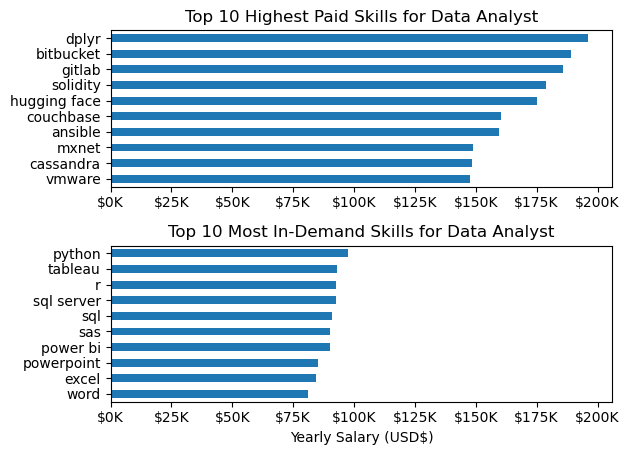

In [5]:
df_US = df_US.explode('job_skills')

df_US_group = df_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_US_top_pay = df_US_group.sort_values(by='median', ascending=False).head(10)

df_US_top_skills = df_US_group.sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

fig, ax = plt.subplots(2,1)

df_US_top_pay.plot(kind='barh',y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_US_top_skills.plot(kind='barh', y='median',ax=ax[1], legend=False)
ax[1].set_xlabel('Yearly Salary (USD$)')
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())




fig.suptitle('')
fig.tight_layout()
plt.show()

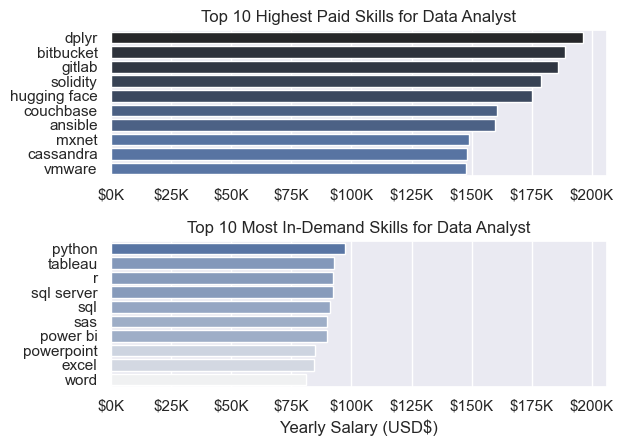

In [ ]:
fig, ax = plt.subplots(2,1)


sns.set_theme(style='ticks')

#df_US_top_pay.plot(kind='barh',y='median', ax=ax[0], legend=False)
sns.barplot(data=df_US_top_pay, x= 'median', y=df_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r',legend=False)

ax[0].set_xlabel('')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#df_US_top_skills.plot(kind='barh', y='median',ax=ax[1], legend=False)

sns.barplot(data=df_US_top_skills, x= 'median', y=df_US_top_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)

ax[1].set_xlabel('Yearly Salary (USD$)')
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())




fig.suptitle('')
fig.tight_layout()

Text(0, 0.5, 'Number of Jobs')

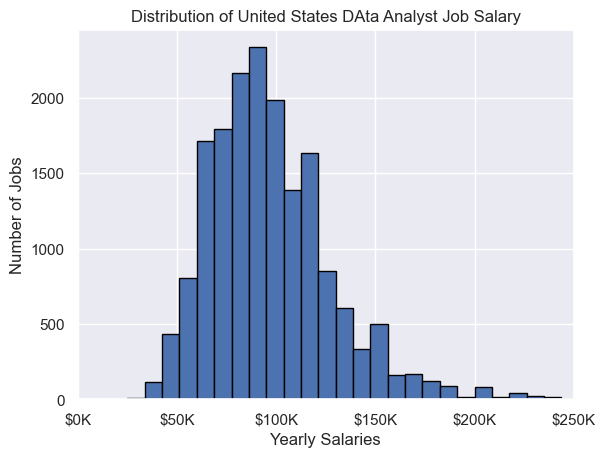

In [ ]:
df_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 250000)

plt.title('Distribution of United States DAta Analyst Job Salary')
plt.xlabel('Yearly Salaries')
plt.ylabel("Number of Jobs")

Text(12.444444444444445, 0.5, 'Number of Jobs')

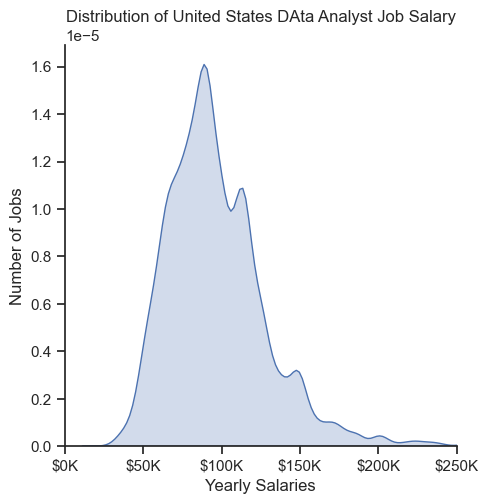

In [12]:
sns.displot(df_US['salary_year_avg'], kind='kde', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 250000)

plt.title('Distribution of United States DAta Analyst Job Salary')
plt.xlabel('Yearly Salaries')
plt.ylabel("Number of Jobs")

C:\Users\Mr. Juanpaulo\AppData\Local\Temp\ipykernel_4220\2078369330.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


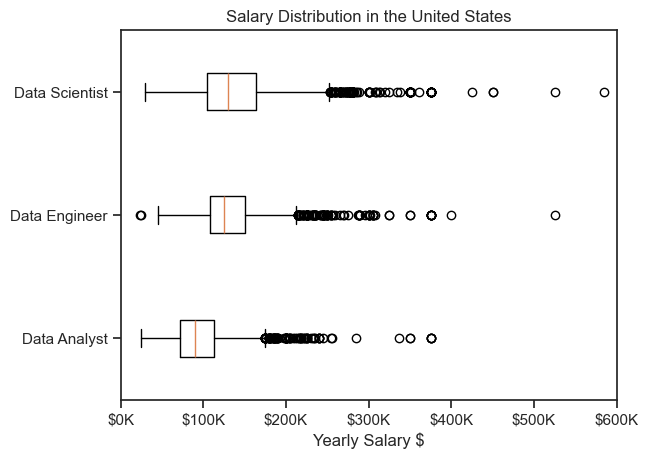

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()

df_US = df_US.dropna(subset='salary_year_avg')

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary $")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

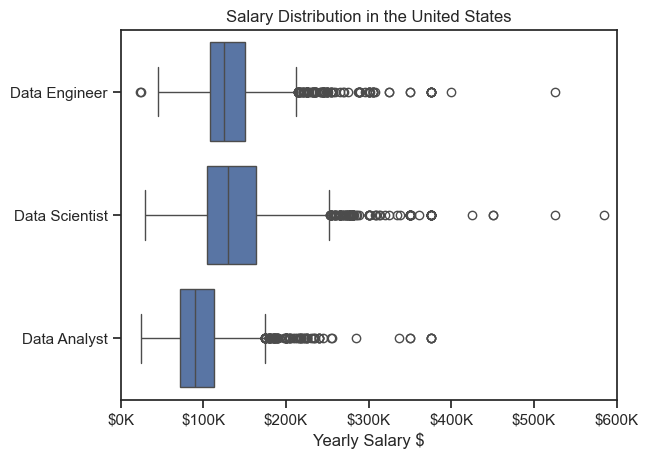

In [15]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary $")
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()